Desarrolle un programa que construya la recta de regresión $y = Ax + B$ que mejor
se ajusta en el sentido de los mínimos cuadrados a los $N$ datos

$(x_1, y_1), (x_2, y_2)...,(x_n, y_n)$

In [8]:
import numpy as np
import pandas as pd
import sympy as sy
import matplotlib.pyplot as plt

Input user finished
[[np.float64(4.0), np.float64(3.0), np.float64(29.0)], [np.float64(3.0), np.float64(29.0), np.float64(45.0)], [np.float64(29.0), np.float64(45.0), np.float64(353.0)]]
[np.float64(8.0), np.float64(5.0), np.float64(79.0)]
[ 0.85051861 -0.19249542  0.17846248]


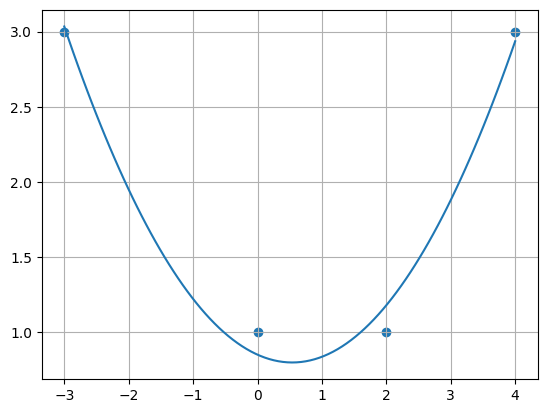

In [21]:
while True:
    vals = input("Enter values, each one followed by a comma, except the last one: ")
    vals_arr = vals.strip().split(",")
    lengthVals = len(vals_arr)
    if lengthVals % 2 == 0:
        break
    else:
        print("You missed a value, verified you're writing pairs")
        dummy = input("Press enter to continue")

xArr, yArr = [], []
for i in range(len(vals_arr)):
    if i % 2 == 0:
        xArr.append(vals_arr[i])
    else:
        yArr.append(vals_arr[i])


k = int(input("Enter the polynomial degree: "))

print("Input user finished")

xFloat = [float(x) for x in xArr]
yFloat = [float(y) for y in yArr]

xPower_k = []
for j in range(k+1):
    row = []
    for i in range(k+1):
        arr_x = np.array([x**(i+j) for x in xFloat])
        sum_term = np.sum(arr_x)
        row.append(sum_term)
    xPower_k.append(row)

xPowTimesY = []

for i in range(k+1):
    arr_y = np.array([x**i * y for x,y in zip(xFloat, yFloat)])
    sum_term = np.sum(arr_y)
    xPowTimesY.append(sum_term)


print(xPower_k)
print(xPowTimesY)

matrix_nxn = np.array(xPower_k)

matrix_nx1 = np.array(xPowTimesY)

constants = np.linalg.solve(matrix_nxn, matrix_nx1)

print(constants)

yMinSQ = []
xCoor = np.linspace(min(xFloat), max(xFloat), num= 100)

for x in xCoor:
    sum = 0
    for i in range(len(constants)):
        c = constants[i]
        sum += c*x**i
    yMinSQ.append(sum)


plt.scatter(xFloat, yFloat)
plt.plot(xCoor, yMinSQ)
plt.grid(True)
